<a href="https://colab.research.google.com/github/Michael-Holland-Dev/CS180/blob/main/data_science_labs/data_science_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 6

## Introduction:
In this lab, we will analyze college football data from the years 2016-2020. The data is spread across multiple files and will require a bit of “data wrangling”. 

Once we have cleaned and processed the data, we will put our statistics knowledge to good use by analyzing digging a little deeper that simple summary statistics.

Very rarely are data scientists handed a pristine data set ready for analysis. More often than not, quite a bit of work is required to clean, and preprocess the data so that it is ready for analysis.

**Data wrangling**—also called **data cleaning, data remediation, or data munging**—refers to a variety of processes designed to transform raw data into more readily used formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve.

Some examples of data wrangling include:

- Merging multiple data sources into a single dataset for analysis

- Identifying gaps in data (for example, empty cells in a spreadsheet) and either filling or deleting them

- Deleting data that’s either unnecessary or irrelevant to the project you’re working on

- Identifying extreme outliers in data and either explaining the discrepancies or removing them so that analysis can take place [1]

#### Measures of Variability
We are very used to dealing with comparing point estimates. For example, in order to tell if one thing is better than the other, we may look at the average of each over time. Consider the following plot comparing the average of two groups, mu_0 and mu_1. 

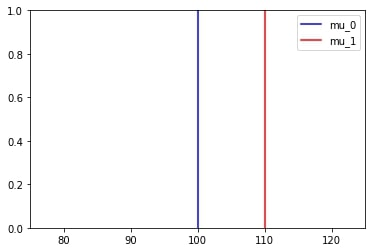

In this case, we might conclude that mu_1 is greater because it’s average is higher. However, we are ignoring an important aspect of the data: its variability. 

Suppose when plot the **variability and the mean**, we observe the following plot:

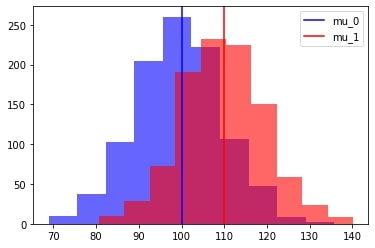

Now the distributions of mu_1 and mu_0 are so close that it’s difficult to say with certainty that mu_1 is better. For any random draw of mu_1, it’s maybe a 50-50 chance to actually be greater than a random draw of mu_0. 

 

Now suppose we observe the following plot:



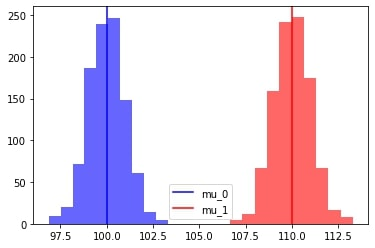

While the means are the same as before, the variability of the two distributions are now very different. We can say with a high degree of certainty that mu_1 is higher.

Keep this idea in mind as you analyze the dataset for this lab

### **Data:**
Data from the 2016, 2017, 2018, 2019, and 2020 college football seasons are available on the course GitHub:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Download the data by running this cell
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb16.csv
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb17.csv
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb18.csv
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb19.csv
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb20.csv

## Exercise 1: Data Aggregation

### Exercise Question
Read all files, combine into a single dataframe.

In [ ]:
# Write your code to combine all of the csvs into one dataframe here
df16 = pd.read_csv('cfb16.csv', index_col=None, header=0)
df16['year'] = 2016
df17 = pd.read_csv('cfb17.csv', index_col=None, header=0)
df17['year'] = 2017
df18 = pd.read_csv('cfb18.csv', index_col=None, header=0)
df18['year'] = 2018
df19 = pd.read_csv('cfb19.csv', index_col=None, header=0)
df19['year'] = 2019
df20 = pd.read_csv('cfb20.csv', index_col=None, header=0)
df20['year'] = 2020

dfs = [ df16, df17, df18, df19, df20 ]
df = pd.concat(dfs, axis=0, ignore_index=True)
df

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,year
0,Akron (MAC),12,5,7,84,776,4649,5.99,38,387.4,...,114,6,8,14,8,14,22,-8,-0.67,2016
1,Alabama (SEC),15,14,1,34,1056,6829,6.47,59,455.3,...,17,13,16,29,10,9,19,10,0.67,2016
2,Appalachian St. (Sun Belt),13,10,3,52,912,5589,6.13,45,429.9,...,18,1,20,21,5,8,13,8,0.62,2016
3,Arizona (Pac-12),12,3,9,67,815,4957,6.08,39,413.1,...,112,6,8,14,9,12,21,-7,-0.58,2016
4,Arizona St. (Pac-12),12,5,7,81,900,4689,5.21,43,390.8,...,93,8,9,17,7,14,21,-4,-0.33,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,West Virginia (Big 12),9,5,4,42,690,3804,5.51,28,422.7,...,42,2,10,12,6,3,9,3,0.33,2020
627,Western Ky. (C-USA),11,5,6,120,699,3200,4.58,21,290.9,...,83,4,5,9,10,2,12,-3,-0.27,2020
628,Western Mich. (MAC),6,4,2,15,392,2878,7.34,32,479.7,...,98,1,2,3,4,2,6,-3,-0.50,2020
629,Wisconsin (Big Ten),6,3,3,93,431,2153,5.00,17,358.8,...,98,4,4,8,5,6,11,-3,-0.50,2020


##Exercise 2: Yearly Counts

### Exercise Question
Add a year column (from the original .csv file name to each row)

In [ ]:
# Write your code to add the year value from each csv
df 
# NOTE: I added the year column above, before concatenating the dataframes

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,year
0,Akron (MAC),12,5,7,84,776,4649,5.99,38,387.4,...,114,6,8,14,8,14,22,-8,-0.67,2016
1,Alabama (SEC),15,14,1,34,1056,6829,6.47,59,455.3,...,17,13,16,29,10,9,19,10,0.67,2016
2,Appalachian St. (Sun Belt),13,10,3,52,912,5589,6.13,45,429.9,...,18,1,20,21,5,8,13,8,0.62,2016
3,Arizona (Pac-12),12,3,9,67,815,4957,6.08,39,413.1,...,112,6,8,14,9,12,21,-7,-0.58,2016
4,Arizona St. (Pac-12),12,5,7,81,900,4689,5.21,43,390.8,...,93,8,9,17,7,14,21,-4,-0.33,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,West Virginia (Big 12),9,5,4,42,690,3804,5.51,28,422.7,...,42,2,10,12,6,3,9,3,0.33,2020
627,Western Ky. (C-USA),11,5,6,120,699,3200,4.58,21,290.9,...,83,4,5,9,10,2,12,-3,-0.27,2020
628,Western Mich. (MAC),6,4,2,15,392,2878,7.34,32,479.7,...,98,1,2,3,4,2,6,-3,-0.50,2020
629,Wisconsin (Big Ten),6,3,3,93,431,2153,5.00,17,358.8,...,98,4,4,8,5,6,11,-3,-0.50,2020


## Exercise 3: Conference Search

### Exercise Question
Create a `conference` field by parsing the `team` column



Example: 

`Team, Conference`

`Penn State University (Big Ten), Big Ten`

In [ ]:
# Write your code to parse the conference from the team name.
df['conference'] = df["Team"].str.split("(", expand = True)[1].str.split(")", expand = True)[0]
df

##Exercise 4: Big Ten Vs. South Eastern

### Exercise Question 4a: Offense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms  of `Off.Yards.per.Game`? Use a [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure.  Comment on the difference in means and the overlap of distributions. 

- Do the same as above for `Off.TDs`

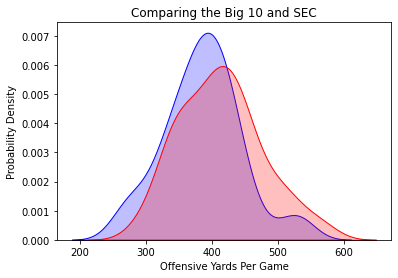

In [ ]:
#Write the code for the statistical differences for Off.Yards.per.Game Here
#off.yards.allowed -> actually spelled "alloweed"
sns.kdeplot(df.loc[(df['conference']=='Big Ten'),
            'Off.Yards.per.Game'], color='b', shade=True, Label='Big Ten')
  
sns.kdeplot(df.loc[(df['conference']=='SEC'), 
            'Off.Yards.per.Game'], color='r', shade=True, Label='SEC')
  
plt.title('Comparing the Big 10 and SEC')
plt.xlabel('Offensive Yards Per Game')
plt.ylabel('Probability Density')
plt.show()

Comment on the difference in means and the overlap of distributions here.

The mean offensive yards per game for the SEC is slightly higher than that of the Big 10. Steepness of the unimodal curve was greater for the Big 10, meaning the Big 10 teams' offensive yards per game were more tightly concentrated around the mean than for teams in the SEC. The overlap of these probability distibutions makes it virtually impossible to guess whether a team is from the Big 10 versus the SEC based on offensive yards per game alone. The difference in distributions here is unlikely to be significant, as the difference in means is likely 20 yards or less. 

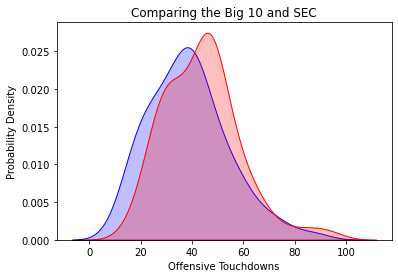

In [ ]:
#Write the code for the statistical differences for Off.TDs Here
sns.kdeplot(df.loc[(df['conference']=='Big Ten'),
            'Off.TDs'], color='b', shade=True, Label='Big Ten')
  
sns.kdeplot(df.loc[(df['conference']=='SEC'), 
            'Off.TDs'], color='r', shade=True, Label='SEC')
  
plt.title('Comparing the Big 10 and SEC')
plt.xlabel('Offensive Touchdowns')
plt.ylabel('Probability Density')
plt.show()

Comment on the difference in means and the overlap of distributions here.

Means in offensive touchdowns per game are very similar between the Big 10 and the SEC, although the mean for SEC teams was around 12-15 higher than for the Big 10. As with offensive yards per game, the SEC does have a slightly higher mean, but the steepness of the unimodal curve is nearly identical between the two. The difference in distribution here is more likely to be significant than it was with offensive yards.

### Exercise Question 4b: Defense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms  of `Points.Allowed`? Use a  [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure.  Comment on the difference in means and the overlap of distributions. 

- Do the same as above for `Opp.Pass.Yds.Allowed` and `Opp.Rush.Yards.Alloweed`



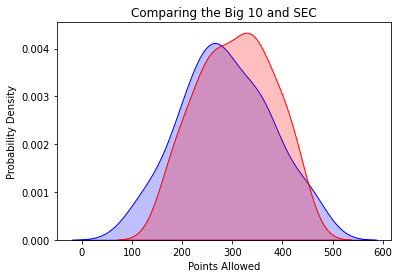

In [ ]:
#Write the code for the statistical differences for Points.Allowed Here
sns.kdeplot(df.loc[(df['conference']=='Big Ten'),
            'Points.Allowed'], color='b', shade=True, Label='Big Ten')
  
sns.kdeplot(df.loc[(df['conference']=='SEC'), 
            'Points.Allowed'], color='r', shade=True, Label='SEC')
  
plt.title('Comparing the Big 10 and SEC')
plt.xlabel('Points Allowed')
plt.ylabel('Probability Density')
plt.show()

Comment on the difference in means and the overlap of distributions here.

The means for points allowed between the Big 10 and SEC were nearly identical, with the Big 10 having a more right-skewed distribution and the SEC having a more uniform distribution. Means here are so similar that the difference is unlikely to be statistically significant. As with offensive yards per game, it would be very difficult to predict the conference of a team based on points allowed. The difference here is quite unlikely to be significant.

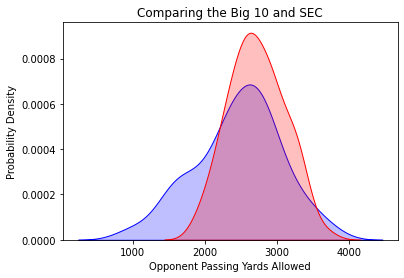

In [ ]:
#Write the code for the statistical differences for Opp.Pass.Yds.Allowed Here
sns.kdeplot(df.loc[(df['conference']=='Big Ten'),
            'Opp.Pass.Yds.Allowed'], color='b', shade=True, Label='Big Ten')
  
sns.kdeplot(df.loc[(df['conference']=='SEC'), 
            'Opp.Pass.Yds.Allowed'], color='r', shade=True, Label='SEC')
  
plt.title('Comparing the Big 10 and SEC')
plt.xlabel('Opponent Passing Yards Allowed')
plt.ylabel('Probability Density')
plt.show()

Comment on the difference in means and the overlap of distributions here.

Means for opponent passing yards allowed between the SEC and Big 10 are virtually identical, but the spread is far wider for the Big 10 compared to the very narrow distribution for the SEC. Due to this major difference in spread, overlap between these distributions is far less than you would see with offensive touchdowns, for example. The difference here is likely to be significant, given the stark difference in spread observed.

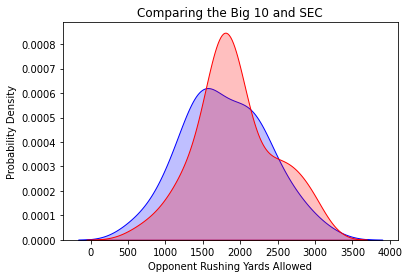

In [ ]:
#Write the code for the statistical differences for Opp.Rush.Yards.Allowed Here
sns.kdeplot(df.loc[(df['conference']=='Big Ten'),
            'Opp.Rush.Yards.Alloweed'], color='b', shade=True, Label='Big Ten')
  
sns.kdeplot(df.loc[(df['conference']=='SEC'), 
            'Opp.Rush.Yards.Alloweed'], color='r', shade=True, Label='SEC')
  
plt.title('Comparing the Big 10 and SEC')
plt.xlabel('Opponent Rushing Yards Allowed')
plt.ylabel('Probability Density')
plt.show()

Comment on the difference in means and the overlap of distributions here.

As with opponent passing yards allowed, the means for opponent rushing yards allowed between the Big 10 and SEC are nearly identical. However, the SEC's distribution curve is more tightly concentrated around its mean than the Big 10 distribution curve is. The peak of the Big 10's opponent passing yards allowed curve is quite blunt, and could be loosely interpreted as bimodal in nature. The Big 10's distribution spread is also greater than that of the SEC by a fair amount, which could point to a statistically-significant difference between these distributions.

## Exercise 5: Offense Statistics

### Exercise Question 5a: Offense
Is the offense changing over time?
Create plot showing the average offensive production over time (each year). Also include an estimate of the variability in your figures. 
Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Off.Yards.per.Game`, `Off.TDs`

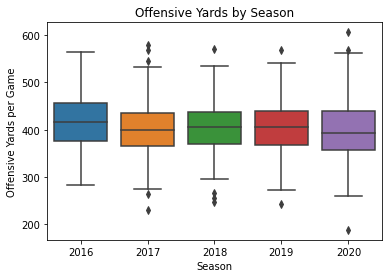

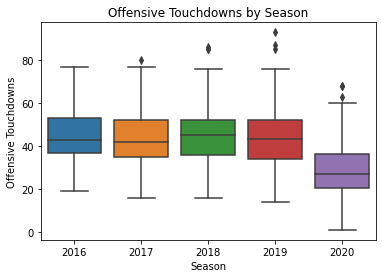

In [ ]:
# Write the plot for the metrics here
sns.boxplot( x=df["year"], y=df["Off.Yards.per.Game"]);
plt.title('Offensive Yards by Season')
plt.xlabel('Season')
plt.ylabel('Offensive Yards per Game')
plt.show()

sns.boxplot( x=df["year"], y=df["Off.TDs"]);
plt.title('Offensive Touchdowns by Season')
plt.xlabel('Season')
plt.ylabel('Offensive Touchdowns')
plt.show()

Comment on any trends you see here.

Offensive yards per season seemed to stay fairly consistent between 2016 and 2020, although there was a slight decrease of this metric in 2020. Variability within this data is concentrated in bands of 50-60 yards for the interquartile range, with the outer quartiles representing around 200 yards of combined variability. The total range of offensive yards per season did seem to taper down somewhat from 2016 to 2018, concentration becoming more and more centered around the mean. That range scaled back out to 2016 levels by 2020. Trends here seem to be small and likely spurious.

Offensive touchdowns by season stayed consistent from 2016 to 2019, but experienced a serious drop in 2020, showing a mean difference between 2019 and 2020 of ~20 touchdowns. This is likely a significant trend, as the year 2020 welcomed in the COVID-19 pandemic and closed many public events and institutions for the year. College football teams played fewer games that year, as a matter of common knowledge, which likely led to lower offensive touchdowns across the board that year.

### Exercise Question 5b: Defense
Is the defense changing over time? Create some plots showing the average defensive production over time (each year). Include an estimate of the variability in your figures. Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Points.Allowed`, `Opp.Pass.Yds.Allowed` and `Opp.Rush.Yards.Allowed`

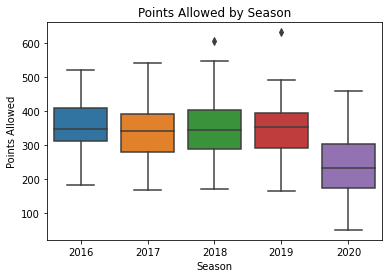

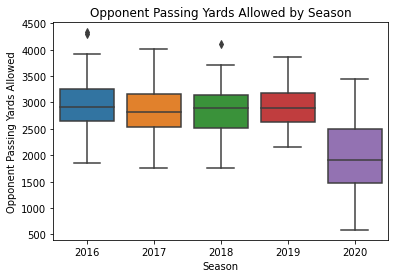

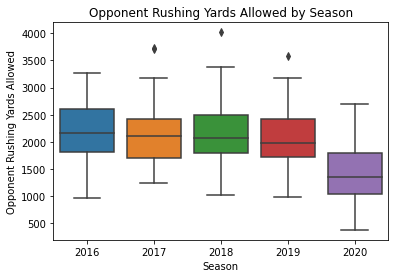

In [ ]:
# Write the plot for the metrics here
sns.boxplot( x=df["year"], y=df["Points.Allowed"]);
plt.title('Points Allowed by Season')
plt.xlabel('Season')
plt.ylabel('Points Allowed')
plt.show()

sns.boxplot( x=df["year"], y=df["Opp.Pass.Yds.Allowed"]);
plt.title('Opponent Passing Yards Allowed by Season')
plt.xlabel('Season')
plt.ylabel('Opponent Passing Yards Allowed')
plt.show()

sns.boxplot( x=df["year"], y=df["Opp.Rush.Yards.Alloweed"]);
plt.title('Opponent Rushing Yards Allowed by Season')
plt.xlabel('Season')
plt.ylabel('Opponent Rushing Yards Allowed')
plt.show()

Comment on any trends you see here.

Points allowed as well as defensive rushing and passing yards stayed consistent from 2016 to 2019 as far as means go, and variability seemed to stay high across all 3 metrics for the same time span. In 2020, however, there was a steep drop in means, minima and maxima for all 3 metrics, likely owing to the 2020 pandemic closing down many sporting events. Playing fewer games most likely leads to lower metrics in these categories. 